In [59]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_nn import optimize
from helpers_nn import accuracy_test
from helpers_nn import predict_one_img

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [3]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [17]:
print(valloader)


64 images in each batch and each image has a dimension of 28 x 28 pixels


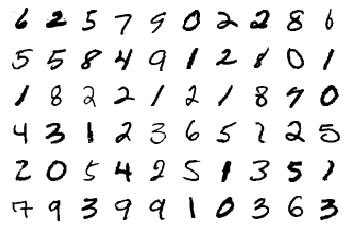

In [88]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

### Model definition
The model is defined, specifying the structure of the fully connected neural network through the vector *hidden_sizes*.

In [9]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

layers = []
for l in range(len(sizes)-1):
    layers.append(nn.Linear(sizes[l],sizes[l+1]))
    if l<len(sizes)-2:
        layers.append(nn.ReLU())
    else:
        layers.append(nn.LogSoftmax(dim=1))
        
model = nn.Sequential(*layers)
print(model)

criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [10]:
"""
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

criterion = nn.NLLLoss()
"""

'\ninput_size = 784\nhidden_sizes = [128, 64]\noutput_size = 10\n\nmodel = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),\n                      nn.ReLU(),\n                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),\n                      nn.ReLU(),\n                      nn.Linear(hidden_sizes[1], output_size),\n                      nn.LogSoftmax(dim=1))\nprint(model)\n\ncriterion = nn.NLLLoss()\n'

### Training
The model is trained with SGD, used as baseline.

In [60]:
r=0.003
momentum=0.9
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15

test_losses, train_losses,accurac = optimize(optimizer, epochs, trainloader,valloader, lr, momentum, model, criterion)

Epoch 0 - Training loss: 0.0002701905040449191
Number Of Images Tested = 10000

Model Accuracy = 0.9805
Epoch 0 - Test loss: 0.10482706659143906
Epoch 1 - Training loss: 0.000265256633310894
Number Of Images Tested = 10000

Model Accuracy = 0.9803
Epoch 1 - Test loss: 0.10594397292967929
Epoch 2 - Training loss: 0.00026399203061116606
Number Of Images Tested = 10000

Model Accuracy = 0.9801
Epoch 2 - Test loss: 0.10569254248098998
Epoch 3 - Training loss: 0.0002607940763698698
Number Of Images Tested = 10000

Model Accuracy = 0.9799
Epoch 3 - Test loss: 0.10567437621663485
Epoch 4 - Training loss: 0.0002587807352092413
Number Of Images Tested = 10000

Model Accuracy = 0.9804
Epoch 4 - Test loss: 0.10574075535885548
Epoch 5 - Training loss: 0.00025567885556608896
Number Of Images Tested = 10000

Model Accuracy = 0.9801
Epoch 5 - Test loss: 0.11441919314151813
Epoch 6 - Training loss: 0.00025328297188548904
Number Of Images Tested = 10000

Model Accuracy = 0.9802
Epoch 6 - Test loss: 0.1

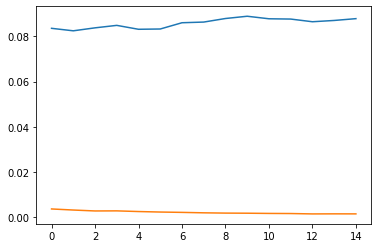

In [26]:
plt.plot(test_losses)
plt.plot(train_losses)

#che cazzz?? cresce ed è molto piu grande della train loss 

In [68]:
# This cell gives insight into how the prediction process works.
images, labels = next(iter(valloader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Probabilities computed for each digit =\n",probab)
print("\nPredicted Digit =", probab.index(max(probab)))
print("Actual Digit =",labels[0].numpy())
#view_classify(img.view(1, 28, 28), ps)

Probabilities computed for each digit =
 [4.632957e-06, 5.140131e-05, 1.9065958e-05, 0.9926165, 0.0036483733, 0.00041103543, 1.1146047e-05, 0.0031636038, 1.10238325e-05, 6.3191e-05]

Predicted Digit = 3
Actual Digit = 3


In [52]:
probabilities, predicctions = predict_one_img(valloader,model)

Probabilities computed for each digit =
 [3.0963787e-16, 1.6100303e-16, 1.0272674e-13, 2.8647522e-09, 2.0396508e-14, 2.2982263e-12, 8.063883e-14, 4.531942e-22, 1.0, 1.0583134e-12]

Predicted Digit = 8
Actual Digit = 8


### Test
The trained model is used to predict the labels of the test set, and the model performance is evaluated.

In [53]:
accuracy = accuracy_test(valloader, model)

Number Of Images Tested = 10000

Model Accuracy = 0.9803
